λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
s_dec = [0.3696437  0.57414574 0.79088791 1.01921019 1.25863259 1.50865509
 1.76881769]
M_halo_dec = [2.41810552e+31 3.66318691e+31 4.92774732e+31 6.20884240e+31
 7.50474656e+31 8.81371351e+31 1.01342800e+32] kg
M_halo_dec/M_PBH = [0.24181055 0.36631869 0.49277473 0.62088424 0.75047466 0.88137135
 1.013428  ]


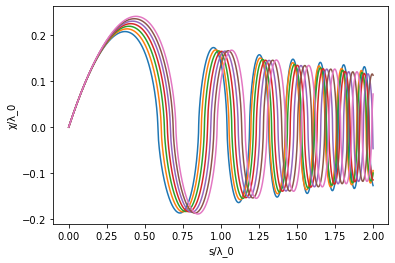

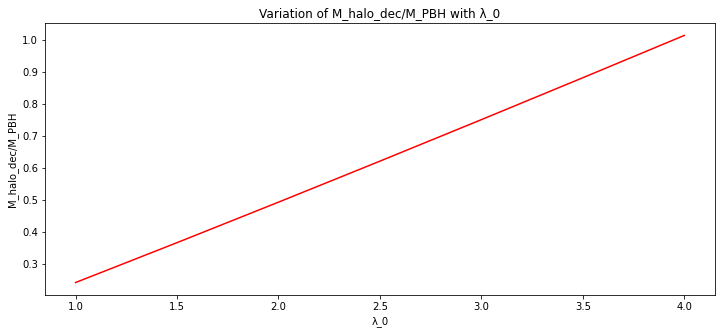

In [1]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling, s_dec for
# PBH binary decoulping around matter-radiation equality using eqs.(1),(2),(4) & (5) in reference 
# "M_DM at s_dec".

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity

def M_halo(s):               #eq.(4) in reference pdf "M_DM at s_dec".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3)))

def s_dec(λ_0,s):
    return (λ_0*s)

def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
for λ_0 in λ_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (3*λ_0)/100000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        plt.plot(As,Bs,'')
        plt.xlabel('s/λ_0')
        plt.ylabel('χ/λ_0')
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            s=As[i]
            if Δ<0:
                break
        
        return s
    
    
s_list=np.zeros(len(λ_list))
s_dec_list=np.zeros(len(λ_list))
M_halo_dec_list = np.zeros(len(λ_list))
M_halo_dec_by_M_PBH = np.zeros(len(λ_list))



for i, λ_0 in enumerate(λ_list):
    s_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_dec_list[i]= s_dec(λ_0,s)
    
for i,s in enumerate(s_dec_list):
    M_halo_dec_list[i]=M_halo(s)
    M_halo_dec_by_M_PBH[i]=((M_halo(s))/M_PBH)
    
    
print("λ_0=",λ_list)
print("s_dec =",s_dec_list,)
print("M_halo_dec =",M_halo_dec_list,"kg")
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)
plt.figure(figsize=(12,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r')
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.title('Variation of M_halo_dec/M_PBH with λ_0')
plt.savefig("100.jpg",dpi=100)
plt.show()  

λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
s_halo_dec = [0.3696437  0.57414574 0.79088791 1.01921019 1.25863259 1.50865509
 1.76881769]
s_no_halo_dec = [0.40604406 0.66480665 0.96840968 1.32346323 1.73749737 2.21874219
 2.77658777]


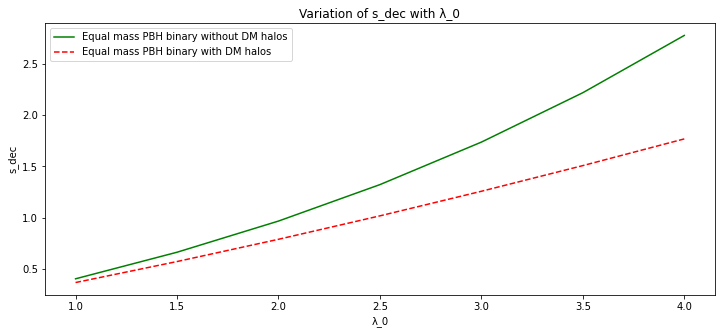

In [2]:
#Comparison graph between the values of s_dec  with  λ_0 for equal mass PBH binary with equally massive DM halos and  equal mass PBH binary without DM halos
# decoupling around matter radiation equality.


λ_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
for λ_0 in λ_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   #eq.(1) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (3*λ_0)/100000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            s=As[i]
            if Δ<0:
                break
        return s
    
    
s_halo_list=np.zeros(len(λ_list))
s_halo_dec_list=np.zeros(len(λ_list))

for i, λ_0 in enumerate(λ_list):
    s_halo_list[i] = s_(λ_0)
for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_halo_dec_list[i]= s_dec(λ_0,s) 
    
    
    
    
for λ_0 in λ_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(6) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (3*λ_0)/100000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            s=As[i]
            if Δ<0:
                break
        return s
    
    
s_list=np.zeros(len(λ_list))
s_dec_list=np.zeros(len(λ_list))

for i, λ_0 in enumerate(λ_list):
    s_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_dec_list[i]= s_dec(λ_0,s)
    
    
print("λ_0=",λ_list)
print("s_halo_dec =",s_halo_dec_list)
print("s_no_halo_dec =",s_dec_list)
plt.figure(figsize=(12,5))
plt.plot(λ_list,s_dec_list,'g')
plt.plot(λ_list,s_halo_dec_list,'r--')
plt.xlabel('λ_0')
plt.ylabel('s_dec')
plt.title('Variation of s_dec with λ_0')
plt.legend(["Equal mass PBH binary without DM halos","Equal mass PBH binary with DM halos"])
plt.savefig("110.jpg",dpi=100)
plt.show()  

λ_0= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
s_dec = [3.51223520e-05 7.02447033e-05 1.05367054e-04 1.40489406e-04
 1.75611757e-04 2.10734108e-04 2.45842459e-04 2.80962810e-04
 3.16083162e-04 3.51203513e-04 7.02327024e-04 1.05343054e-03
 1.40441404e-03 1.75541755e-03 2.10626106e-03 2.45716457e-03
 2.80786808e-03 3.15867159e-03 3.50923509e-03 7.01247013e-03
 1.05097051e-02 1.40001400e-02 1.74851749e-02 2.09642096e-02
 2.44372444e-02 2.79042790e-02 3.13653137e-02]
M_halo_dec = [2.42537054e+27 4.85074102e+27 7.27611150e+27 9.70148198e+27
 1.21268525e+28 1.45522229e+28 1.69766266e+28 1.94018590e+28
 2.18270914e+28 2.42523237e+28 4.84991230e+28 7.27445411e+28
 9.69816726e+28 1.21220185e+29 1.45447649e+29 1.69679256e+29
 1.93897052e+29 2.18121753e+29 2.42329881e+29 4.84245429e+29
 7.25746643e+29 9.66778279e+29 1.20743701e+30 1.44768142e+30
 1.68

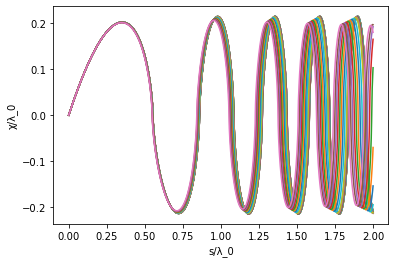

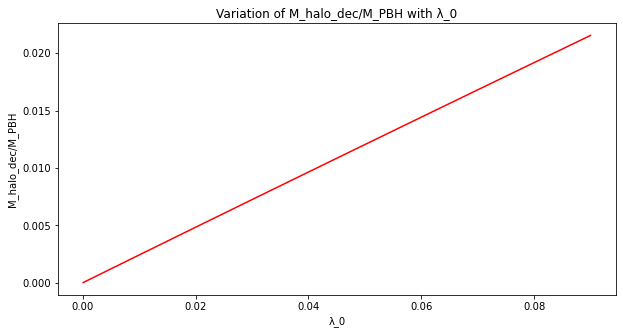

In [3]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling, s_dec for
# decoulping earlier in radiation era using eqs.(8),(9),(11) & (12) in reference 
# "M_DM at s_dec".


def M_r_halo(s):    #Mass of the DM halo given by eq.(11) in reference pdf "M_DM at s_dec".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def s_dec(λ_0,s):
    return (λ_0*s)


def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)

λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for λ_0 in λ_list:
    def s_(λ_0):
        def f(u,s,λ_0):
            return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(8) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= ((λ_0)/1000)
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        plt.plot(As,Bs,'')
        plt.xlabel('s/λ_0')
        plt.ylabel('χ/λ_0')
        Bs_list = Bs.tolist() 
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            s=As[i]
            if Δ<0:
                break
              
        return s
   
            
            
    
s_list=np.zeros(len(λ_list))
s_dec_list=np.zeros(len(λ_list))
M_halo_dec_list = np.zeros(len(λ_list))
M_halo_dec_by_M_PBH = np.zeros(len(λ_list))



for i, λ_0 in enumerate(λ_list):
    s_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_dec_list[i]= s_dec(λ_0,s)
    
for i,s in enumerate(s_dec_list):
    M_halo_dec_list[i]=M_r_halo(s)
    M_halo_dec_by_M_PBH[i]=((M_halo(s))/M_PBH)
    
    
print("λ_0=",λ_list)
print("s_dec =",s_dec_list,)
print("M_halo_dec =",M_halo_dec_list,"kg")
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)
plt.figure(figsize=(10,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r')
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.title('Variation of M_halo_dec/M_PBH with λ_0')
plt.savefig("125.jpg",dpi=100)
plt.show()

λ_0= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
s_dec = [3.51223520e-05 7.02447033e-05 1.05367054e-04 1.40489406e-04
 1.75611757e-04 2.10734108e-04 2.45856459e-04 2.80978811e-04
 3.16101162e-04 3.51223513e-04 7.02447025e-04 1.05367054e-03
 1.40489405e-03 1.75611756e-03 2.10734107e-03 2.45856459e-03
 2.80978810e-03 3.16101161e-03 3.51223512e-03 7.02447025e-03
 1.05367054e-02 1.40489405e-02 1.75611756e-02 2.10734107e-02
 2.45856459e-02 2.80978810e-02 3.16101161e-02]
s_halo_dec = [3.51223520e-05 7.02447033e-05 1.05367054e-04 1.40489406e-04
 1.75611757e-04 2.10734108e-04 2.45842459e-04 2.80962810e-04
 3.16083162e-04 3.51203513e-04 7.02327024e-04 1.05343054e-03
 1.40441404e-03 1.75541755e-03 2.10626106e-03 2.45716457e-03
 2.80786808e-03 3.15867159e-03 3.50923509e-03 7.01247013e-03
 1.05097051e-02 1.40001400e-02 1.74851749e-02 2.09642096e-02
 2.44

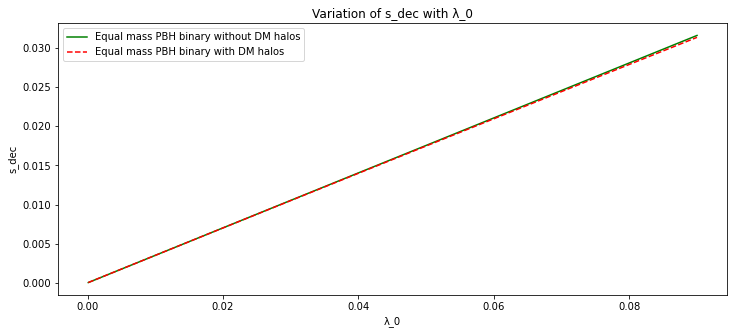

In [4]:
#Comparison graph between the values of s_dec  with  λ_0 for equal mass PBH binary with equally massive DM halos and equal mass PBH binary without DM halos 
# decoupling earlier in radiation era.




λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for λ_0 in λ_list:
    def s_(λ_0):
        def f(u,s,λ_0):
            return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(8) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= ((λ_0)/1000)
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist() 
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            s=As[i]
            if Δ<0:
                break
              
        return s
   
            
            
    
s_halo_list=np.zeros(len(λ_list))
s_halo_dec_list=np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
    s_halo_list[i] = s_(λ_0)
for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_halo_dec_list[i]= s_dec(λ_0,s)

    
    
    
    
    
    
for λ_0 in λ_list:
    def s_(λ_0):
        def f(u,s,λ_0):
            return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_0*((u[0]**2+b**2)**(3/2))))]   #eq.(13) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= ((λ_0)/1000)
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist() 
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            s=As[i]
            if Δ<0:
                break
              
        return s
   
            
            
    
s_list=np.zeros(len(λ_list))
s_dec_list=np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
    s_list[i] = s_(λ_0)
for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_dec_list[i]= s_dec(λ_0,s)
 


print("λ_0=",λ_list)
print("s_dec =",s_dec_list)
print("s_halo_dec =",s_halo_dec_list)
plt.figure(figsize=(12,5))
plt.plot(λ_list,s_dec_list,'g')
plt.plot(λ_list,s_halo_dec_list,'r--')
plt.xlabel('λ_0')
plt.ylabel('s_dec')
plt.title('Variation of s_dec with λ_0')
plt.legend(["Equal mass PBH binary without DM halos","Equal mass PBH binary with DM halos"])
plt.savefig("120.jpg",dpi=100)
plt.show()  

λ_0 = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
s_dec_halo = [3.41736758e-05 6.83473509e-05 1.02521026e-04 1.36689368e-04
 1.70861709e-04 2.05034051e-04 2.39206393e-04 2.73368068e-04
 3.07539076e-04 3.41710085e-04 6.83366834e-04 1.02497025e-03
 1.36646700e-03 1.70795041e-03 2.04938049e-03 2.39075724e-03
 2.73208065e-03 3.07335073e-03 3.41443415e-03 6.82326823e-03
 1.02265023e-02 1.36236029e-02 1.70148368e-02 2.04010040e-02
 2.37815711e-02 2.71554716e-02 3.05247052e-02 3.69643696e-01
 5.74145741e-01 7.90887909e-01 1.01921019e+00 1.25863259e+00
 1.50865509e+00 1.76881769e+00]
M_halo_dec = [2.35985979e+27 4.71971954e+27 7.07957928e+27 9.43907072e+27
 1.17988384e+28 1.41586061e+28 1.65183737e+28 1.88774048e+28
 2.12370804e+28 2.35967560e+28 4.71898290e+28 7.07792190e+28
 9.43612430e+28 1.17942346e+29 1.4151976

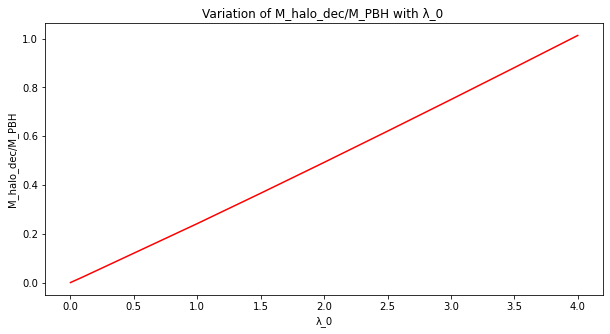

In [8]:
# Combined graph showing the variation of  M_halo_dec/M_PBH with λ_0 for equal-mass PBH binaries with DM halos of equal mass decoupling in radiation era 
# and around matter-radiation equality.

λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for λ_0 in λ_1_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))] #eq.(8) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (2*λ_0)/100000
        ss= np.linspace(1e-12,((4*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            if Δ<0:
                s=As[i] 
                break
        return s
        
            
    
s_1_list=np.zeros(len(λ_1_list))
s_dec_1_list=np.zeros(len(λ_1_list))
M_halo_dec_1_list = np.zeros(len(λ_1_list))
M_halo_dec_1_by_M_PBH = np.zeros(len(λ_1_list))



for i, λ_0 in enumerate(λ_1_list):
    s_1_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_1_list,s_1_list)):
    s_dec_1_list[i]= s_dec(λ_0,s)
    
for i,s in enumerate(s_dec_1_list):
    M_halo_dec_1_list[i]=M_r_halo(s)
    M_halo_dec_1_by_M_PBH[i]=((M_halo(s))/M_PBH)
    
λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
for λ_0 in λ_2_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (3*λ_0)/100000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            if Δ<0:
                s=As[i]
                break
        return s
    
    
s_2_list=np.zeros(len(λ_2_list))
s_dec_2_list=np.zeros(len(λ_2_list))
M_halo_dec_2_list = np.zeros(len(λ_2_list))
M_halo_dec_2_by_M_PBH = np.zeros(len(λ_2_list))

for i, λ_0 in enumerate(λ_2_list):
    s_2_list[i] = s_(λ_0)
for i, (λ_0,s) in enumerate(zip(λ_2_list,s_2_list)):
    s_dec_2_list[i]= s_dec(λ_0,s)
for i,s in enumerate(s_dec_2_list):
    M_halo_dec_2_list[i]=M_halo(s)
    M_halo_dec_2_by_M_PBH[i]=((M_halo(s))/M_PBH)
    
    
λ_list = λ_1_list+λ_2_list
s_dec_halo_list = np.append(s_dec_1_list,s_dec_2_list)
M_halo_dec_list =np.append(M_halo_dec_1_list,M_halo_dec_2_list)
M_halo_dec_by_M_PBH = np.append(M_halo_dec_1_by_M_PBH,M_halo_dec_2_by_M_PBH )


print("λ_0 =",λ_list)
print("s_dec_halo =",s_dec_halo_list)
print("M_halo_dec =",M_halo_dec_list,"kg")
print("M_halo_dec/M_PBH =",M_halo_dec_by_M_PBH)


plt.figure(figsize=(10,5))
plt.plot(λ_list,M_halo_dec_by_M_PBH,'r')
plt.xlabel('λ_0')
plt.ylabel('M_halo_dec/M_PBH')
plt.title('Variation of M_halo_dec/M_PBH with λ_0 ')
plt.savefig("135.jpg",dpi=100)
plt.show()

In [6]:
# Evaluation of s_dec for equal-mass PBH binaries without DM halos decoupling in radiation era 
# and around matter-radiation equality.




λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.08]
for λ_0 in λ_1_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_0*((u[0]**2+b**2)**(3/2))))]   #eq.(13) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (2*λ_0)/100000
        ss= np.linspace(1e-12,((4*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            if Δ<0:
                s=As[i] 
                break
        return s
        
            
    
s_1_list=np.zeros(len(λ_1_list))
s_dec_1_list=np.zeros(len(λ_1_list))
M_halo_dec_1_list = np.zeros(len(λ_1_list))
M_halo_dec_1_by_M_PBH = np.zeros(len(λ_1_list))



for i, λ_0 in enumerate(λ_1_list):
    s_1_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_1_list,s_1_list)):
    s_dec_1_list[i]= s_dec(λ_0,s)
    

λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
for λ_0 in λ_2_list:
    def s_(λ_0):
        def f(u,s,λ_0):
             return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]                 #eq.(6) in reference pdf "M_DM at s_dec".
        separation0= [1e-12,1]
        b= (3*λ_0)/100000
        ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
        us= odeint(f,separation0,ss,args=( λ_0,))
        separations= us[:,0]
        As=ss/λ_0
        Bs=separations/λ_0
        Bs_list = Bs.tolist()
        As_list = As.tolist()
        for i in  range(1,len(Bs_list)):
            Δ=(Bs[i] - Bs[i-1])
            if Δ<0:
                s=As[i]
                break
       
        return s
    
    
s_2_list=np.zeros(len(λ_2_list))
s_dec_2_list=np.zeros(len(λ_2_list))


for i, λ_0 in enumerate(λ_2_list):
    s_2_list[i] = s_(λ_0)
for i, (λ_0,s) in enumerate(zip(λ_2_list,s_2_list)):
    s_dec_2_list[i]= s_dec(λ_0,s)

    
    
λ_list = λ_1_list+λ_2_list
s_dec_list = np.append(s_dec_1_list,s_dec_2_list)



print("λ_0 =",λ_list)
print("s_dec =",s_dec_list)

λ_0 = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.09, 0.08, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
s_dec = [3.41736758e-05 6.83473509e-05 1.02521026e-04 1.36694701e-04
 1.70868376e-04 2.05042051e-04 2.39215726e-04 2.73389401e-04
 3.07563076e-04 3.41736751e-04 6.83473502e-04 1.02521025e-03
 1.36694700e-03 1.70868375e-03 2.05042050e-03 2.39215726e-03
 2.73389401e-03 3.07563076e-03 3.41736751e-03 6.83473501e-03
 1.02521025e-02 1.36694700e-02 1.70875042e-02 2.05050051e-02
 2.39215725e-02 3.07563076e-02 2.73389401e-02 4.06044060e-01
 6.64806648e-01 9.68409684e-01 1.32346323e+00 1.73749737e+00
 2.21874219e+00 2.77658777e+00]


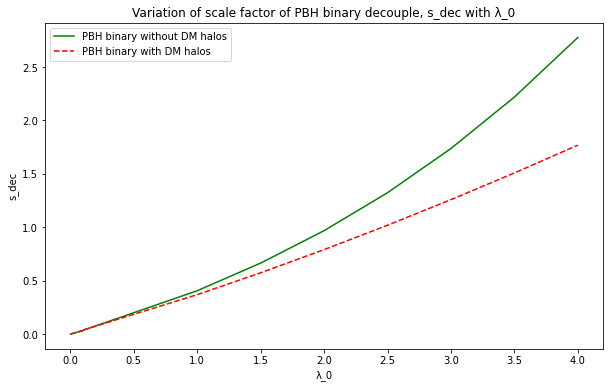

In [7]:
# Plot for the variation of s_dec with λ_0 for equal-mass PBH binaries with DM halos of equal mass and without DM halos decoupling in radiation era 
# and around matter-radiation equality.  


plt.figure(figsize=(10,6))
plt.plot(λ_list,s_dec_list,'g')
plt.plot(λ_list,s_dec_halo_list,'r--')
plt.xlabel('λ_0')
plt.ylabel('s_dec')
plt.title('Variation of scale factor of PBH binary decouple, s_dec with λ_0')
plt.legend(["PBH binary without DM halos","PBH binary with DM halos"])
plt.savefig("130.jpg",dpi=100)
plt.show()